# Importing libraries

In [1]:
!pip install wordcloud


In [2]:
!pip install pillow

In [7]:
import os


import pandas as pd
import numpy as np
import nltk as nlp
import matplotlib.pyplot as plt
import seaborn as sns


import scipy.stats as stats
import plotly.express as px


from collections import Counter
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

import nltk
nltk.download('stopwords')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np
import urllib.request

%matplotlib inline

In [5]:
from textblob import TextBlob
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [6]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import defaultdict

# Data loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Text Analysis Folder/data.csv')

<ipython-input-94-de563f7f1ccb>:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Text Analysis Folder/data.csv')


In [ ]:
df.head()

,Project ID,School ID,Teacher ID,Project Title,Project Short Description,Project Need Statement,Project Subject Category,Project Grade Level,Project Resource Type,Project Total Price Excluding Optional Support,Project Total Price Including Optional Support,Project Posted Date,Project Expiration Date,Project Completed Date,Project Funding Status,Project Donation Total Amount,Project Eligible Double Your Impact Match (Yes / No),Project Eligible Almost Home Match (Yes / No),Project Url,Project Subject
0,00002b6d53ed2ce021d762d3cba3c386,a350b201d895038159395d6c7dc5f9da,f8e59be7af40dd7b1afd09ac9a3381db,Counting in Pre-K!,I teach 20 curious Pre-k students. Our school is located within a small neighborhood community. All of the students that participate in the program are from low income families who all qualify for...,Help me give my students the Magnetic Learning Numbers Kit to improve number recognition skill.,Math & Science,Grades PreK-2,Educational Kits & Games,420.15,494.29,2019-01-18,2019-05-12,NaN,expired,0,No,No,http://donorschoose.org/project/3878862,Mathematics
1,00004c31ce07c22148ee37acd0f814b9,d4cc7b903f7ee195dbb8db17486d02d8,293eb4b2b9cdd4b49fc7d18c75a477f0,Needed Softball Uniform Shirts,I love the ah-ha moments when they get new concepts. They are all special in many different ways because of their diverse backgrounds and economic hardships. They are 85 percent economically...,Help me give my students needed new uniforms for the team. They have been playing in t shirts because that is all that was in the budget. The 2019 season was the 2nd year of the season.,Health & Sports,Grades 6-8,Books,"2,317.13","2,726.04",2019-05-31,2019-09-29,NaN,expired,0,No,No,http://donorschoose.org/project/4148176,Team Sports
2,0000e4e8ebb8ebacc6374cb2096ab7f4,6416a2992b0c6119d34c2140db481ad3,6a3b646002800e735b8afa9a908c2143,Tech Savvy Second Graders,"I teach second grade in an urban setting. My classroom consist of 26 seven and eight year olds with diverse learning profiles, who come from a variety of cultures and an ever growing population of...",My students need quality technology to support their learning in our classroom.,Literacy & Language,Grades PreK-2,Technology,819.75,964.41,2016-08-28,2016-12-27,NaN,expired,25,No,No,http://donorschoose.org/project/2174321,ESL
3,00012d5f91843d1f9a7ffe38528da29b,c28880d9e87589b79bc6144d1fd263e4,276b4b13d83a1fb68f7687e5042dc7bf,Flexible Seating for Reading Time!,"My students are creative, thoughtful and full of questions! They absolutely love hands-on, active, engaging projects and challenges that allow them to think outside the box to find solutions! They...","Help me give my students comfortable seating for my students to enjoy read- aloud, read-to-self and independent work!",Literacy & Language,Grades PreK-2,Flexible Seating,416.12,489.55,2019-08-03,2019-12-10,NaN,expired,150,No,No,http://donorschoose.org/project/4269979,ESL
4,00016a8df533917c073ce3bffe6f25ee,1c767810fe6b79de02f606b5ab80ced4,ceea5ea6343ffa847a51c576a3715f44,iPad Saavy Learners,"My students are inquisitive and loving third graders who enjoy coming to school to learn everyday. They are passionate about their academics and despite many obstacles, they strive to persevere...",Help me give my students 2 iPads where they can gain access to reading and math learning apps!,Applied Learning,Grades 3-5,Computers & Tablets,704.49,828.81,2018-11-18,2019-03-16,NaN,expired,0,No,No,http://donorschoose.org/project/3774249,College & Career Prep


In [ ]:
df.dtypes

Project ID                                              object
School ID                                               object
Teacher ID                                              object
Project Title                                           object
Project Short Description                               object
Project Need Statement                                  object
Project Subject Category                                object
Project Grade Level                                     object
Project Resource Type                                   object
Project Total Price Excluding Optional Support          object
Project Total Price Including Optional Support          object
Project Posted Date                                     object
Project Expiration Date                                 object
Project Completed Date                                  object
Project Funding Status                                  object
Project Donation Total Amount                          

In [ ]:
df.shape

(2210531, 20)

In [ ]:
df = df.sort_values('Project Posted Date', ascending=False)

In [ ]:
df.head()

,Project ID,School ID,Teacher ID,Project Title,Project Short Description,Project Need Statement,Project Subject Category,Project Grade Level,Project Resource Type,Project Total Price Excluding Optional Support,Project Total Price Including Optional Support,Project Posted Date,Project Expiration Date,Project Completed Date,Project Funding Status,Project Donation Total Amount,Project Eligible Double Your Impact Match (Yes / No),Project Eligible Almost Home Match (Yes / No),Project Url,Project Subject
56564,3b3a80478a31547eac3af8665c45ee3a,e3212e4770d82b9da8fe70b2a543914d,ef1d131f6deeea625bf055b038be51d4,Big Dreams with a Mini iPad,"As a teacher in a low-income/high poverty school district, I recognize that my students are faced with challenges both in and out of the classroom. Despite the many challenges they face, they are...",Help me give my students a mini iPad for their blended learning goals.,Literacy & Language,Grades PreK-2,Computers & Tablets,933.19,"1,097.87",2020-03-31,2020-07-31,NaN,live,0,No,No,http://donorschoose.org/project/4857193,Literacy
620768,89b26599104e9a52d0dd699ab11e0e5d,0ca2a89cd99f28dc25d0a05258f2b26e,719de730bcb11159bdbfa551fe8a707d,Tablet for Education,My four year old students are very energetic! They come from a low-income community. Small group is where my students get most of their instruction from. Providing them with tablets will help them...,Help me give my students the technology to be successfully in the classroom,Literacy & Language,Grades PreK-2,Computers & Tablets,537.5,632.35,2020-03-31,2020-07-31,NaN,live,0,No,No,http://donorschoose.org/project/4856966,Literacy
410650,ad9e9bba67c695835eccf0813b212d94,aef8a202233f9702ce435811e9d5d49b,353ab449f7041837468e0243d0c54e09,Supplies to Help us Create!,"As a teacher in a low-income/high poverty school district, my students are faced with challenges both in and outside of the classroom. Despite the challenges they face, I am looking to help them...","Help me give my students pencils, construction paper, pens and a pencil sharpener.",Literacy & Language,Grades PreK-2,Classroom Basics,182.91,215.19,2020-03-31,2020-07-31,NaN,live,145,No,No,http://donorschoose.org/project/4855533,Literature & Writing
433042,c50708ceef3a0ff9d6d78b2bc1e3cbfd,17169b64fbee58e0cf186169eb421de5,e2d565869c1f71b81caa0d1262c75342,Stellar Science,"My students are from a very small, rural school district in Oklahoma. Our students come from low socioeconomic backgrounds, over 85% receive reduced-price or free meals. \r\nThe students in my...",Help me give my students an engaging science experience complete with hands on activities and videos from Generation Genius.,Math & Science,Grades 3-5,Instructional Technology,161.58,190.09,2020-03-31,2020-07-31,NaN,live,25,No,No,http://donorschoose.org/project/4857472,Applied Sciences
127824,867000dc821bcb84700506ac7db4034d,f2dbf82949f86ae034226b1ac17d1e95,433206293a5c3b2a1b761de1931c6c76,Let's Go Grocery Shopping!,"All students, including those with special needs, have the ability to learn. It is always important to remember that every student has the capacity and potential to learn, just not on the same day...",Help me give my students a Pretend & Play Market to improve their financial literacy skills through meaningful shopping experiences!,Math & Science,Grades PreK-2,Educational Kits & Games,471.49,554.69,2020-03-31,2020-07-31,NaN,live,0,No,No,http://donorschoose.org/project/4848902,Financial Literacy


In [ ]:
df['Project Posted Date'] = pd.to_datetime(df['Project Posted Date'])


df['posted_year'] = df['Project Posted Date'].dt.year

In [ ]:
df['posted_year'].unique()

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011])

Filtering out the data based on the required date range

In [ ]:
start_date = '2012-01-01'
end_date = '2017-12-31'


df = df[(df['Project Posted Date'] >= start_date) & (df['Project Posted Date'] <= end_date)]

In [ ]:
df['posted_year'].unique()

array([2017, 2016, 2015, 2014, 2013, 2012])

In [ ]:
df['Project Donation Total Amount'].unique()

array(['0', '25', '150', ..., '109.68', '8.2', '160.5'], dtype=object)

In [ ]:
df['Project Donation Total Amount'] = df['Project Donation Total Amount'].str.replace(',', '')

df['Project Donation Total Amount'] = df['Project Donation Total Amount'].astype(float)

Added column identifier for a project to check whether it recieved funding or not


In [ ]:
df['funding_recieved'] = df['Project Donation Total Amount'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
df['Project Total Price Including Optional Support'] = df['Project Total Price Including Optional Support'].str.replace(',', '')

df['Project Total Price Including Optional Support'] = df['Project Total Price Including Optional Support'].astype(float)

Added column to calculate the funding percentage the project recieved


In [ ]:
df['funding_recieved_pct'] = df['Project Donation Total Amount']/df['Project Total Price Including Optional Support']

Added column identifier for a project to check whether it recieved full funding or not


In [ ]:
df['fully funded'] = 0
for i in range(1, len(df)):
    if df.loc[i, 'funding_recieved_pct'] == 1:
        df.loc[i, 'fully funded'] = 1


In [ ]:
df.head()

,Project ID,School ID,Teacher ID,Project Title,Project Short Description,Project Need Statement,Project Subject Category,Project Grade Level,Project Resource Type,Project Total Price Excluding Optional Support,...,Project Completed Date,Project Funding Status,Project Donation Total Amount,Project Eligible Double Your Impact Match (Yes / No),Project Eligible Almost Home Match (Yes / No),Project Url,Project Subject,funding_recieved,funding_recieved_pct,fully funded
0,00002b6d53ed2ce021d762d3cba3c386,a350b201d895038159395d6c7dc5f9da,f8e59be7af40dd7b1afd09ac9a3381db,Counting in Pre-K!,I teach 20 curious Pre-k students. Our school ...,Help me give my students the Magnetic Learning...,Math & Science,Grades PreK-2,Educational Kits & Games,420.15,...,NaN,expired,0.0,No,No,http://donorschoose.org/project/3878862,Mathematics,0,0.000000,0
1,00004c31ce07c22148ee37acd0f814b9,d4cc7b903f7ee195dbb8db17486d02d8,293eb4b2b9cdd4b49fc7d18c75a477f0,Needed Softball Uniform Shirts,I love the ah-ha moments when they get new con...,Help me give my students needed new uniforms f...,Health & Sports,Grades 6-8,Books,"2,317.13",...,NaN,expired,0.0,No,No,http://donorschoose.org/project/4148176,Team Sports,0,0.000000,0
2,0000e4e8ebb8ebacc6374cb2096ab7f4,6416a2992b0c6119d34c2140db481ad3,6a3b646002800e735b8afa9a908c2143,Tech Savvy Second Graders,I teach second grade in an urban setting. My c...,My students need quality technology to support...,Literacy & Language,Grades PreK-2,Technology,819.75,...,NaN,expired,25.0,No,No,http://donorschoose.org/project/2174321,ESL,1,0.025923,0
3,00012d5f91843d1f9a7ffe38528da29b,c28880d9e87589b79bc6144d1fd263e4,276b4b13d83a1fb68f7687e5042dc7bf,Flexible Seating for Reading Time!,"My students are creative, thoughtful and full ...",Help me give my students comfortable seating f...,Literacy & Language,Grades PreK-2,Flexible Seating,416.12,...,NaN,expired,150.0,No,No,http://donorschoose.org/project/4269979,ESL,1,0.306404,0
4,00016a8df533917c073ce3bffe6f25ee,1c767810fe6b79de02f606b5ab80ced4,ceea5ea6343ffa847a51c576a3715f44,iPad Saavy Learners,My students are inquisitive and loving third g...,Help me give my students 2 iPads where they ca...,Applied Learning,Grades 3-5,Computers & Tablets,704.49,...,NaN,expired,0.0,No,No,http://donorschoose.org/project/3774249,College & Career Prep,0,0.000000,0


In [ ]:
df = df.loc[:, ['Project Title', 'Project Need Statement', 'Project Subject Category','Project Resource Type','Project Grade Level', 'funding_recieved', 'funding_recieved_pct','fully funded']]

In [ ]:
df['Complete_text'] = df['Project Title'] + ' ' + df['Project Need Statement']

In [ ]:
df.head()

,Project Title,Project Need Statement,Project Subject Category,Project Resource Type,Project Grade Level,funding_recieved,funding_recieved_pct,fully funded,Complete_text
0,Counting in Pre-K!,Help me give my students the Magnetic Learning...,Math & Science,Educational Kits & Games,Grades PreK-2,0,0.000000,0,Counting in Pre-K! Help me give my students th...
1,Needed Softball Uniform Shirts,Help me give my students needed new uniforms f...,Health & Sports,Books,Grades 6-8,0,0.000000,0,Needed Softball Uniform Shirts Help me give my...
2,Tech Savvy Second Graders,My students need quality technology to support...,Literacy & Language,Technology,Grades PreK-2,1,0.025923,0,Tech Savvy Second Graders My students need qua...
3,Flexible Seating for Reading Time!,Help me give my students comfortable seating f...,Literacy & Language,Flexible Seating,Grades PreK-2,1,0.306404,0,Flexible Seating for Reading Time! Help me giv...
4,iPad Saavy Learners,Help me give my students 2 iPads where they ca...,Applied Learning,Computers & Tablets,Grades 3-5,0,0.000000,0,iPad Saavy Learners Help me give my students 2...


**TF IDF**

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
Complete_text_string = df['Complete_text'].str.cat(sep='')
print(Complete_text_string)

Counting in Pre-K! Help me give my students the Magnetic Learning Numbers Kit to improve number recognition skill.Needed Softball Uniform Shirts Help me give my students needed new uniforms for the team. They have been playing in t shirts because that is all that was in the budget.  The 2019 season was the 2nd year of the season.Tech Savvy Second Graders My students need quality technology to support their learning in our classroom.Flexible Seating for Reading Time! Help me give my students comfortable seating for my students to enjoy read- aloud, read-to-self and independent work!iPad Saavy Learners Help me give my students 2 iPads where they can gain access to reading and math learning apps!Furniture for a Thriving Learning Environment My students need two tables in order to begin our journey in creating an innovative classroom learning environment.   Document Camera Needed to Capture, Compel & Create My students need a document camera, case and cable to bridge the gap between what I

In [ ]:
Complete_text_string = Complete_text_string.lower()

In [ ]:
words = nltk.word_tokenize(Complete_text_string)

In [ ]:
import re
import string

Remove punctuations, spaces, stopwords, extra characters

For stop words we updated the list to add words such as 'students', 'need','help','give','learning','reading' as they are very often repeated and might not uncover other possible insights

In [ ]:
table = str.maketrans('', '', string.punctuation + string.digits + ' ')
words = [word.translate(table) for word in words]
words = [word for word in words if word]

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stopWordList = set(stopwords.words('english'))


new_words = ['students', 'need','help','give','learning','reading','classroom','school']
stopWordList.update(new_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
cleaned_documents = [word for word in words if word.casefold() not in stopWordList]

In [ ]:
len(cleaned_documents)

181022

In [ ]:
word_counts = {}
for word in cleaned_documents:
    if word not in word_counts:
        word_counts[word] = 0
    word_counts[word] += 1

In [ ]:
sorted_words = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))

In [ ]:
sorted_words

{'classroom': 2700,
 'books': 2034,
 'math': 1620,
 'technology': 1611,
 'seating': 1375,
 'learn': 1333,
 'use': 1088,
 'new': 1082,
 'ipad': 1080,
 'science': 1006,
 'school': 931,
 'flexible': 899,
 'skills': 893,
 'supplies': 882,
 'work': 867,
 'materials': 856,
 'read': 825,
 'class': 807,
 'ipads': 744,
 'create': 702,
 'chromebooks': 700,
 'access': 667,
 'chairs': 631,
 'literacy': 620,
 'center': 617,
 'make': 614,
 'world': 610,
 'set': 608,
 'fun': 596,
 'book': 583,
 'stem': 571,
 'library': 539,
 'time': 537,
 'art': 528,
 'headphones': 528,
 'games': 522,
 'order': 519,
 'us': 514,
 'writing': 514,
 'grade': 501,
 'activities': 498,
 'paper': 473,
 'get': 455,
 'tablets': 451,
 'love': 451,
 'enhance': 438,
 'keep': 434,
 'readers': 423,
 'practice': 422,
 'comfortable': 417,
 'allow': 410,
 'student': 408,
 'printer': 406,
 'two': 404,
 'opportunity': 404,
 'storage': 399,
 'wobble': 397,
 'small': 393,
 'like': 392,
 'listening': 391,
 'able': 389,
 'needs': 389,
 'bui

In [ ]:
len(sorted_words)

21967

Word cloud displays the most frequently repeated words in the requests made by the petitionors

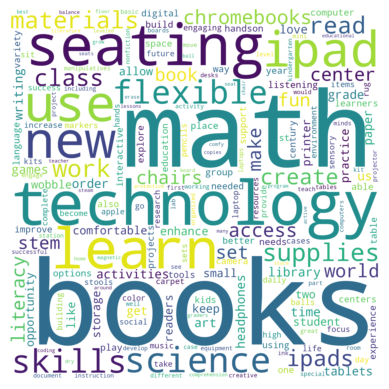

In [ ]:
wc = WordCloud(width=1800, height=1800, background_color='white', min_font_size=10)
wc.generate_from_frequencies(sorted_words)

# Display the generated image using imshow()
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# Flesch- Kincaid Reading Level

In [ ]:
!pip install textstat
!pip install spellchecker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 33.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 35.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for spellchecker: filename=spellchecker-0.4-py3-none-any.whl size=3966516 sha256=2298e17bdacd11b40be7d052dc662f3b7b774a38d52bb35dde88c8d31fcd5394
  Stored in directory: /root/.cache/pip/wheels/6c/90/c3/eac248d8755b2a7343487a2087b4b29ad98f388c3c8c69c286
  Created wheel for inexactsearch: filename=inexactsearch-1.0.2-py3-none-any.whl size=7141 sha256=c7f46d52f61a460e53591ec5394ebe7f

In [ ]:
import pandas as pd
import textstat

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

In [ ]:
df['flesch_kincaid'] = df['Complete_text'].apply(lambda x: textstat.flesch_kincaid_grade(x))

In [ ]:
df.head()

,Project Title,Project Need Statement,Project Subject Category,Project Resource Type,Project Grade Level,funding_recieved,funding_recieved_pct,fully funded,Complete_text,flesch_kincaid
0,Counting in Pre-K!,Help me give my students the Magnetic Learning...,Math & Science,Educational Kits & Games,Grades PreK-2,0,0.000000,0,Counting in Pre-K! Help me give my students th...,6.8
1,Needed Softball Uniform Shirts,Help me give my students needed new uniforms f...,Health & Sports,Books,Grades 6-8,0,0.000000,0,Needed Softball Uniform Shirts Help me give my...,5.1
2,Tech Savvy Second Graders,My students need quality technology to support...,Literacy & Language,Technology,Grades PreK-2,1,0.025923,0,Tech Savvy Second Graders My students need qua...,9.5
3,Flexible Seating for Reading Time!,Help me give my students comfortable seating f...,Literacy & Language,Flexible Seating,Grades PreK-2,1,0.306404,0,Flexible Seating for Reading Time! Help me giv...,9.0
4,iPad Saavy Learners,Help me give my students 2 iPads where they ca...,Applied Learning,Computers & Tablets,Grades 3-5,0,0.000000,0,iPad Saavy Learners Help me give my students 2...,6.8


Range


# Word count analysis

Add new columns to determine the total number of words in the request and the number of spelling mistakes in the request

In [ ]:
df['word_count'] = df['Complete_text'].apply(lambda x: len(str(x).split()))

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('words')

from nltk.tokenize import word_tokenize
from nltk.corpus import words

# Define function to count spelling mistakes in a sentence
def count_spelling_mistakes(sentence):
    mistake_count = 0
    word_list = word_tokenize(sentence.lower())
    for word in word_list:
        if word not in words.words():
            mistake_count += 1
    return mistake_count


# Apply function to each row of the dataframe and store result in new column
df['spelling_mistakes'] = df['Complete_text'].apply(count_spelling_mistakes)

# Print resulting dataframe
df.head()

In [ ]:

from nltk.corpus import words

nltk.download('words')

word_list = words.words()

def count_spelling_mistakes(text):
    """
    Count the number of spelling mistakes in a given text.
    """
    words = nltk.word_tokenize(text.lower())
    # Count the number of misspelled words
    count = 0
    for word in words:
        if word not in word_list:
            count += 1
    return count

# Apply the function to the DataFrame column
df['spelling_mistakes'] = df['Complete_text'].apply(count_spelling_mistakes)
df.head()


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


                            Project Title  \
0                      Counting in Pre-K!   
1          Needed Softball Uniform Shirts   
2               Tech Savvy Second Graders   
3      Flexible Seating for Reading Time!   
4                     iPad Saavy Learners   
...                                   ...   
14995                   Creative Littles!   
14996               Focusing on Teamwork!   
14997        Getting the News from Poetry   
14998     Supplies For Our Little Artists   
14999     When We READ...We Will SUCCEED!   

                                  Project Need Statement  \
0      Help me give my students the Magnetic Learning...   
1      Help me give my students needed new uniforms f...   
2      My students need quality technology to support...   
3      Help me give my students comfortable seating f...   
4      Help me give my students 2 iPads where they ca...   
...                                                  ...   
14995  Help me give my students a fun i

In [ ]:
df.head()

,Project Title,Project Need Statement,Project Subject Category,Project Resource Type,Project Grade Level,funding_recieved,funding_recieved_pct,Complete_text,flesch_kincaid,word_count
0,Counting in Pre-K!,Help me give my students the Magnetic Learning...,Math & Science,Educational Kits & Games,Grades PreK-2,0,0.000000,Counting in Pre-K! Help me give my students th...,6.8,18
1,Needed Softball Uniform Shirts,Help me give my students needed new uniforms f...,Health & Sports,Books,Grades 6-8,0,0.000000,Needed Softball Uniform Shirts Help me give my...,5.1,41
2,Tech Savvy Second Graders,My students need quality technology to support...,Literacy & Language,Technology,Grades PreK-2,1,0.025923,Tech Savvy Second Graders My students need qua...,9.5,16
3,Flexible Seating for Reading Time!,Help me give my students comfortable seating f...,Literacy & Language,Flexible Seating,Grades PreK-2,1,0.306404,Flexible Seating for Reading Time! Help me giv...,9.0,23
4,iPad Saavy Learners,Help me give my students 2 iPads where they ca...,Applied Learning,Computers & Tablets,Grades 3-5,0,0.000000,iPad Saavy Learners Help me give my students 2...,6.8,21


# Sentiment Analysis

In [ ]:
nltk.download('vader_lexicon')

def categorize_sentiment(polarity):
    if polarity < -0.6:
        return "very negative"
    elif polarity < 0:
        return "negative"
    elif polarity == 0:
        return "neutral"
    elif polarity < 0.6:
        return "positive"
    else:
        return "very positive"


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
df.head()

,Project Title,Project Need Statement,Project Subject Category,Project Resource Type,Project Grade Level,funding_recieved,funding_recieved_pct,fully funded,Complete_text,flesch_kincaid,word_count
0,Counting in Pre-K!,Help me give my students the Magnetic Learning...,Math & Science,Educational Kits & Games,Grades PreK-2,0,0.000000,0,Counting in Pre-K! Help me give my students th...,6.8,18
1,Needed Softball Uniform Shirts,Help me give my students needed new uniforms f...,Health & Sports,Books,Grades 6-8,0,0.000000,0,Needed Softball Uniform Shirts Help me give my...,5.1,41
2,Tech Savvy Second Graders,My students need quality technology to support...,Literacy & Language,Technology,Grades PreK-2,1,0.025923,0,Tech Savvy Second Graders My students need qua...,9.5,16
3,Flexible Seating for Reading Time!,Help me give my students comfortable seating f...,Literacy & Language,Flexible Seating,Grades PreK-2,1,0.306404,0,Flexible Seating for Reading Time! Help me giv...,9.0,23
4,iPad Saavy Learners,Help me give my students 2 iPads where they ca...,Applied Learning,Computers & Tablets,Grades 3-5,0,0.000000,0,iPad Saavy Learners Help me give my students 2...,6.8,21


In [ ]:
df['polarity'] = df['Complete_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Categorize the sentiment polarity score into five buckets for each text
df['sentiment_bucket'] = df['polarity'].apply(categorize_sentiment)

# Print the DataFrame with the new 'sentiment_bucket' column
df.head()

,Project Title,Project Need Statement,Project Subject Category,Project Resource Type,Project Grade Level,funding_recieved,funding_recieved_pct,fully funded,Complete_text,flesch_kincaid,word_count,polarity,sentiment_bucket
0,Counting in Pre-K!,Help me give my students the Magnetic Learning...,Math & Science,Educational Kits & Games,Grades PreK-2,0,0.000000,0,Counting in Pre-K! Help me give my students th...,6.8,18,0.7345,very positive
1,Needed Softball Uniform Shirts,Help me give my students needed new uniforms f...,Health & Sports,Books,Grades 6-8,0,0.000000,0,Needed Softball Uniform Shirts Help me give my...,5.1,41,0.5423,positive
2,Tech Savvy Second Graders,My students need quality technology to support...,Literacy & Language,Technology,Grades PreK-2,1,0.025923,0,Tech Savvy Second Graders My students need qua...,9.5,16,0.4019,positive
3,Flexible Seating for Reading Time!,Help me give my students comfortable seating f...,Literacy & Language,Flexible Seating,Grades PreK-2,1,0.306404,0,Flexible Seating for Reading Time! Help me giv...,9.0,23,0.8930,very positive
4,iPad Saavy Learners,Help me give my students 2 iPads where they ca...,Applied Learning,Computers & Tablets,Grades 3-5,0,0.000000,0,iPad Saavy Learners Help me give my students 2...,6.8,21,0.7500,very positive


In [ ]:
df_sorted = df.sort_values('polarity', ascending=False)

In [ ]:
top_50 = df_sorted.head(50)
bottom_50 = df_sorted.tail(50)

In [ ]:
pd.set_option('display.max_colwidth', 500)

In [ ]:
top_50['Complete_text']

In [ ]:
bottom_50['Complete_text']

We see that help plays a important factor in the polarity score of the request


# Ngram columnization



In [ ]:
import string
import nltk
from collections import defaultdict
from nltk.util import ngrams
from nltk.corpus import stopwords

nltk.download('stopwords')

# Define the text corpus
corpus = Complete_text_string

# Tokenize the text and remove punctuations, digits, stopwords, and spaces
table = str.maketrans('', '', string.punctuation + string.digits)
words_n = nltk.word_tokenize(corpus.lower())
words_n = [word.translate(table) for word in words_n]
words_to_remove = {'students', 'need','help','give','learning','reading','classroom','school'}
words_n = [word.strip() for word in words_n if word not in stopwords.words('english') and word not in words_to_remove and word.strip() != '']

# Remove any empty strings from the list of words
words_n = list(filter(None, words_n))

# Define the number of grams you want to consider
n = 3

# Create a dictionary to store the n-grams and their frequency counts
ngram_counts = defaultdict(int)

# Create the n-grams and count their frequency
for gram in ngrams(words_n, n):
    ngram_counts[gram] += 1

ngram_counts = {gram: count for gram, count in ngram_counts.items() if count > 10}

sorted_ngrams = sorted(ngram_counts.items(), key=lambda x: x[1], reverse=True)

# Print the n-grams and their frequency counts
ngrams_list = [gram for gram, count in sorted_ngrams]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
for gram, count in sorted_ngrams[:5000]:
    print(gram, count)

('flexible', 'seating', 'options') 207
('dry', 'erase', 'markers') 73
('bean', 'bag', 'chairs') 67
('seating', 'flexible', 'seating') 55
('dry', 'erase', 'boards') 44
('flexible', 'seating', 'flexible') 39
('small', 'group', 'instruction') 38
('science', 'social', 'studies') 35
('fine', 'motor', 'skills') 28
('st', 'century', 'skills') 27
('st', 'century', 'learners') 26
('balance', 'ball', 'chairs') 25
('science', 'technology', 'engineering') 24
('amazon', 'fire', 'tablets') 24
('ipads', 'protective', 'cases') 24
('two', 'ipad', 'minis') 23
('kindle', 'fire', 'tablets') 22
('high', 'interest', 'books') 21
('st', 'century', 'technology') 20
('options', 'flexible', 'seating') 20
('books', 'books', 'books') 20
('english', 'language', 'learners') 20
('color', 'printer', 'ink') 19
('successful', 'st', 'century') 19
('ron', 'clark', 'academy') 19
('practice', 'math', 'skills') 18
('ipad', 'minis', 'protective') 18
('ipad', 'minis', 'cases') 17
('start', 'new', 'year') 17
('center', 'listeni

In [ ]:
total_count = 0
n_grams_count = 0
for gram, count in sorted_ngrams:
    total_count += count
    n_grams_count += 1

avg_count = total_count / n_grams_count
print("Average count of n-grams", avg_count)

Average count of n-grams 20.88888888888889


In [ ]:
def create_ngram_row(text):
    # Tokenize the text and remove punctuations, digits, stopwords, and spaces
    words_n = nltk.word_tokenize(text.lower())
    words_n = [word.translate(table) for word in words_n]
    words_n = [word.strip() for word in words_n if word not in stopwords.words('english') and word.strip() != '']

    # Remove any empty strings from the list of words
    words_n = list(filter(None, words_n))

    # Create a set of the n-grams in the text
    text_ngrams = set(ngrams(words_n, n))

    # Create a dictionary indicating whether each n-gram is present in the text
    ngram_dict = {gram: 1 if gram in text_ngrams else 0 for gram in ngrams_list}
    return ngram_dict

# Apply the create_ngram_row function to each row of the dataframe and create new columns indicating whether each n-gram is present in the text
df = pd.concat([df, df['Complete_text'].apply(create_ngram_row).apply(pd.Series)], axis=1)

# Display the resulting dataframe
df.head()